# **Limpieza de Datos**
En este notebook, se realiza la limpieza del dataset [Global Air Pollution][kaggle]


[kaggle]: https://www.kaggle.com/datasets/hasibalmuzdadid/global-air-pollution-dataset

### **Objetivos**

1. Identificación de valores nulos
2. Eliminación y/o reemplazo de valores nulos
3. Identificación y eliminación de valores duplicados
4. Generación del nuevo dataset tratado

### Importar librerías 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Cargando el Dataset

In [2]:
df = pd.read_csv("../data/global_air_pollution.csv")

### Búsqueda de valores NaN
A continuación se presenta la cantidad de valores nulos por cada columna.

In [3]:
df.isna().sum()

Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

Solamente dos variables del dataset presentan valores nulos:
- La variable `Country` presenta 427.
- La variable `City` presenta 1.

In [14]:
porcentaje_nulos_country = (df['Country'].isna().sum() / len(df)) * 100
print(f"Porcentaje de valores nulos en Country: {porcentaje_nulos_country:.3f} %")

porcentaje_nulos_city = (df['City'].isna().sum() / len(df)) * 100
print(f"Porcentaje de valores nulos en City: {porcentaje_nulos_city:.3f} %")

Porcentaje de valores nulos en Country: 1.820 %
Porcentaje de valores nulos en City: 0.004 %


Estos resultados sugieren que hay una cantidad mínima de valores nulos en la columna "City" (apenas el 0.004%), mientras que la columna "Country" tiene un porcentaje algo mayor pero todavía bajo, con 1.82%. Esto indica que el dataset está mayormente completo y no habrá preocupación por la eliminación de datos, al menos en estas columnas.

In [17]:
# Eliminar la columna Country
df.drop('Country', axis=1, inplace=True)

# Reemplazar el valor nulor de City, por la media
df.fillna({'City': df['City'].mode()[0]}, inplace=True)

# Imprimir la información
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   City                23463 non-null  object
 1   AQI Value           23463 non-null  int64 
 2   AQI Category        23463 non-null  object
 3   CO AQI Value        23463 non-null  int64 
 4   CO AQI Category     23463 non-null  object
 5   Ozone AQI Value     23463 non-null  int64 
 6   Ozone AQI Category  23463 non-null  object
 7   NO2 AQI Value       23463 non-null  int64 
 8   NO2 AQI Category    23463 non-null  object
 9   PM2.5 AQI Value     23463 non-null  int64 
 10  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(6)
memory usage: 2.0+ MB


### Búsqueda de valores Duplicados
Se procede a identificar y eliminar las filas duplicadas para asegurar que cada registro en el dataset sea único y evitar algún tipo de sesgo.

In [18]:
print(f'Cantidad de filas duplicadas: {df.duplicated().sum()}')

Cantidad de filas duplicadas: 0


### Búsqueda de valores atípicos
Se implementa la visualización de los datos para encontrar valores atípicos. 

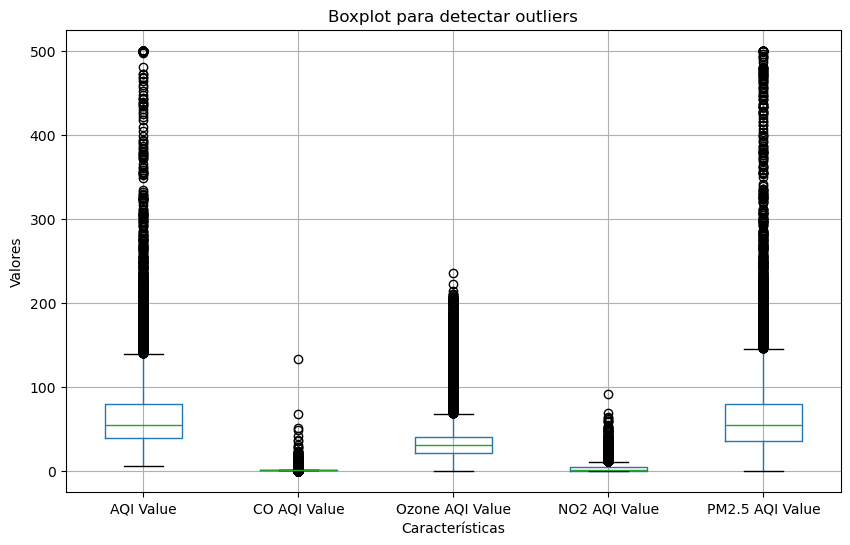

In [21]:
# Ajustar las dimensiones del gráfico
plt.figure(figsize=(10, 6))  # Cambia los números para ajustar ancho y alto

# Crear un boxplot para las columnas especificadas
plt.boxplot = df.boxplot(column=['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value'])

# Mostrar el gráfico
plt.title('Boxplot para detectar outliers')
plt.xlabel('Características')
plt.ylabel('Valores')
plt.show()

### Normalización de Texto
Se pretende eliminar espacios al principio y final de los valores de la columna `City` y dejar el texto uniforme

In [24]:
df['City'] = df['City'].str.strip()

#### Dataset limpio

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   City                23463 non-null  object
 1   AQI Value           23463 non-null  int64 
 2   AQI Category        23463 non-null  object
 3   CO AQI Value        23463 non-null  int64 
 4   CO AQI Category     23463 non-null  object
 5   Ozone AQI Value     23463 non-null  int64 
 6   Ozone AQI Category  23463 non-null  object
 7   NO2 AQI Value       23463 non-null  int64 
 8   NO2 AQI Category    23463 non-null  object
 9   PM2.5 AQI Value     23463 non-null  int64 
 10  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(6)
memory usage: 2.0+ MB


### Generación del Dataset Limpio

In [26]:
df.to_csv('../data/dataset_clean.csv', index=False)